In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# divide df into dependent and independent features
x = df.iloc[:,3:13]
y = df.iloc[:,13]

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
## Feature Engineering
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
# concat these dummies
x = x.drop(['Geography','Gender'],axis=1)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
x = pd.concat([x,geography,gender],axis =1)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
from tensorflow.python.ops.math_ops import xlogy_eager_fallback
#splitting the df into traininf and test 
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [ ]:
xtrain

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
xtrain.shape,xtest.shape

((8000, 11), (2000, 11))

In [ ]:
#  part ceaate ANN 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU,Dropout

In [ ]:
# initialize ANN
classifier = Sequential()

In [ ]:
## Addding input layer 
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
## Adding 1 st hidden layer 
classifier.add(Dense(units = 7,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
##adding 2nd hidden layer 
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
##adding output layer 
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
## early stopping 
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    )

In [ ]:
model = classifier.fit(xtrain,ytrain,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.5972 - accuracy: 0.7509 - val_loss: 0.4794 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4857 - accuracy: 0.8020 - val_loss: 0.4384 - val_accuracy: 0.8061
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4555 - accuracy: 0.8112 - val_loss: 0.4202 - val_accuracy: 0.8201
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4347 - accuracy: 0.8168 - val_loss: 0.4084 - val_accuracy: 0.8277
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4190 - accuracy: 0.8248 - val_loss: 0.4004 - val_accuracy: 0.8330
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4037 - accuracy: 0.8276 - val_loss: 0.3899 - val_accuracy: 0.8376
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3967 - accuracy: 0.8317 - val_loss: 0.3796 - val_accuracy:

In [ ]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

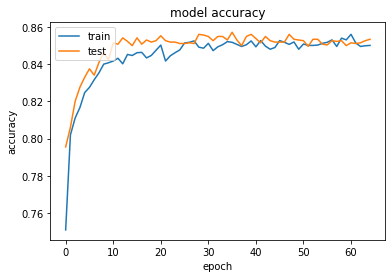

In [ ]:
## summarizr histroy for accuracy

plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
#  prediction
yp = classifier.predict(xtest)
yp = (yp>=0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
##make the confusion  matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,yp)
cm

array([[1540,   55],
       [ 215,  190]])

In [ ]:
## calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(yp,ytest)

In [ ]:
score

0.865

In [ ]:
### get the weights 

classifier.get_weights()